<a href="https://colab.research.google.com/github/BharathkumarK19/Fine-tunned_model/blob/main/Fine_Tunning_CatvsDog_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Cat Vs Dog Classification model
# By fine tunning the VGG-NET16 MODEL

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download('https://www.kaggle.com/datasets/salader/dogs-vs-cats')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: "bharathkaranam45"
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats


100%|██████████| 1.06G/1.06G [00:08<00:00, 135MB/s]


In [ ]:
import opendatasets as od
import tensorflow as tf
import keras
from keras.layers import Dense,Conv2D,Flatten,BatchNormalization
from keras.models import Sequential
from keras.applications.vgg16 import VGG16

In [ ]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/dogs-vs-cats/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150,150)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
con_base=VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in con_base.layers:
  print(layer.name)

input_layer
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_pool


In [ ]:
con_base.trainable=True
set_trainable=False
for layer in con_base.layers:
  if layer.name=='block5_conv1':
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False


In [ ]:
for layer1 in con_base.layers:
  print(layer1.name,layer1.trainable)

input_layer False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [ ]:
#Generating the Data by Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rotation_range=40,
)
train_generator = train_datagen.flow_from_directory(
    '/content/dogs-vs-cats/train',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 20000 images belonging to 2 classes.


In [ ]:
#Architecture
model=Sequential()
model.add(con_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
import tensorflow

In [ ]:
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_generator,epochs=10,validation_data=test_ds)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


625/625 ━━━━━━━━━━━━━━━━━━━━ 173s 255ms/step - accuracy: 0.7795 - loss: 0.4457 - val_accuracy: 0.8946 - val_loss: 0.2546
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 187s 247ms/step - accuracy: 0.9048 - loss: 0.2282 - val_accuracy: 0.9340 - val_loss: 0.1594
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 212s 264ms/step - accuracy: 0.9101 - loss: 0.2124 - val_accuracy: 0.9436 - val_loss: 0.1455
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 157s 249ms/step - accuracy: 0.9220 - loss: 0.1855 - val_accuracy: 0.9496 - val_loss: 0.1310
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 262ms/step - accuracy: 0.9345 - loss: 0.1660 - val_accuracy: 0.9404 - val_loss: 0.1505
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 202s 263ms/step - accuracy: 0.9402 - loss: 0.1558 - val_accuracy: 0.9456 - val_loss: 0.1377
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 262ms/step - accuracy: 0.9419 - loss: 0.1440 - val_accuracy: 0.9554 - val_loss: 0.1120
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 165s 262ms/step - accuracy: 0.9463 - loss: 0.13

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
test_img=cv2.imread('/content/catimage.jpg')

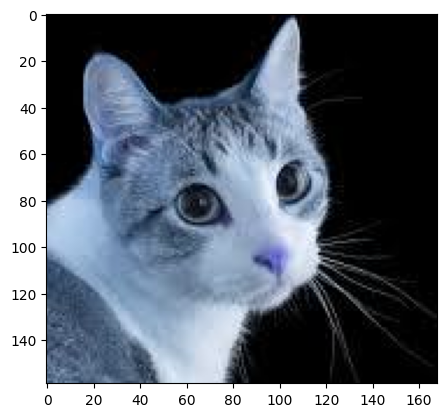

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(159, 168, 3)

In [ ]:
test_img=cv2.resize(test_img,(150,150))

In [ ]:
test_input=test_img.reshape(1,150,150,3)

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.]], dtype=float32)

In [ ]:
test_img1=cv2.imread('/content/Dog13image.webp')

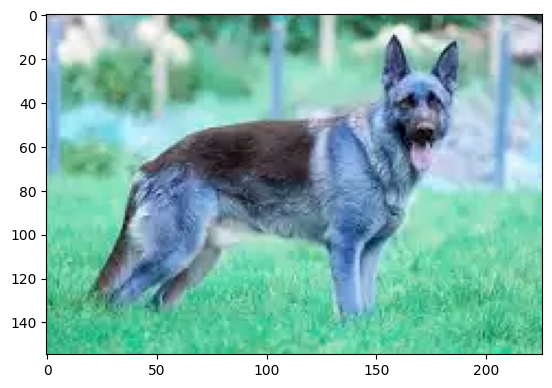

In [ ]:
plt.imshow(test_img1)

In [ ]:
test_img1=cv2.resize(test_img1,(150,150))

In [ ]:
test_input1=test_img1.reshape(1,150,150,3)

In [ ]:
model.predict(test_input1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


array([[1.]], dtype=float32)